<a href="https://colab.research.google.com/github/JohnPaul1278/ps6/blob/main/ps6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

need more for final project! fine to add new stuff but people typically reuse stuff from earlier ps (improved and polished)--that way it is easier

In [1]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('classic')

<Axes: xlabel='DATE'>

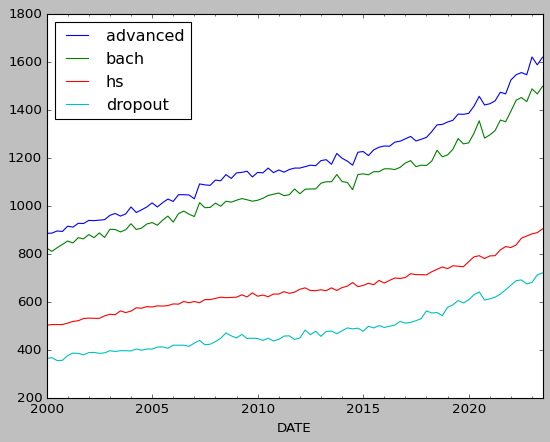

In [2]:
start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2023, 10, 1)
df = pdr.DataReader(['LEU0252918500Q','LEU0252919100Q', 'LEU0252917300Q', 'LEU0252916700Q'],
                    'fred', start, end)
#LEU0252918500Q= bachelor's degree or higher
#LEU0252919100Q= bachelor's degree only
#LEU0252917300Q= high school education
#LEU0252916700Q= less than high school education
#these datasets all look at both wage and salary workers ages 25 and up.

df=df.rename(columns={"LEU0252918500Q": "advanced",
                      "LEU0252919100Q": "bach",
                      "LEU0252917300Q": "hs",
                      "LEU0252916700Q": "dropout",
                      "DATE": "year"})

df.plot()

In [3]:
pip install cpi==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 3.0 MB/s eta 0:00:00


In [4]:
import cpi

/usr/local/lib/python3.10/dist-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [5]:
cpi.update()

In [6]:
df

,advanced,bach,hs,dropout
DATE,,,,
2000-01-01,886,825,503,365
2000-04-01,887,811,506,368
2000-07-01,896,826,506,356
2000-10-01,894,840,506,357
2001-01-01,916,854,512,377
...,...,...,...,...
2022-07-01,1556,1452,866,692
2022-10-01,1547,1435,875,675
2023-01-01,1621,1488,884,682


While this part is fairly tedious, I found it easier than trying to convert the entire dataset. I'm going to inflate the weekly median income of working adults over the age of 25 in four categories:
1. Adults with a bachelor's degree or higher
2. Adults with a bachelor's degree but nothing higher
3. Adults who graduated from high school
4. Adults who did not graduate from high school.

I'm going to inflate the value of each category using the January reports from every four years starting with the year 2000 and ending with the year 2020.

# Weekly median income in the year 2000

Adults over the age of 25 with a bachelor's degree or higher:

In [7]:
cpi.inflate(886, 2000)

1394.189430894309

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(825, 2000)

1298.2012195121954

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(503, 2000)

791.509349593496

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(365, 2000)

574.3556910569106

# Weekly median income in the year 2004

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(996, 2004)

1428.7248279512971

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(926, 2004)

1328.3124404446799

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(562, 2004)

806.16802541027

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(396, 2004)

568.0472207517205



```
#
```

# Weekly median income in the year 2008

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1108, 2008)

1394.4755066116124

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1012, 2008)

1273.6545240893067

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(615, 2008)

774.0094192835214

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(435, 2008)

547.4700770541981

# Weekly median income in the year 2012

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1158, 2012)

1366.6875440995846

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1057, 2012)

1247.485953465683

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(653, 2012)

770.6795909300766

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(450, 2012)

531.096195893621

# Weekly median income in the year 2016

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1250, 2016)

1411.2609215564548

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1155, 2016)

1304.0050915181641

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(679, 2016)

766.5969325894662

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(494, 2016)

557.7303161991109

# Weekly median income in the year 2020

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1386, 2020)

1451.1145971384526

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1263, 2020)

1322.336028994131

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(768, 2020)

804.0808157303981

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(609, 2020)

637.610959348714

Text(0.5, 1.0, 'median weekly income by education attainment adjusted for inflation')

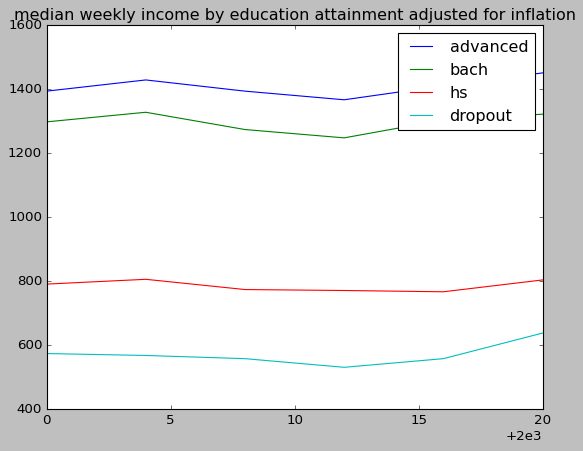

In [ ]:
x1 = [2000,2004,2008,2012,2016,2020]
y1 = [1394,1429,1394,1367,1411,1451]
plt.plot(x1, y1, label = "advanced")

x2 = [2000,2004,2008,2012,2016,2020]
y2 = [1298,1328,1274,1248,1304,1322]
plt.plot(x2, y2, label = "bach")

x3 = [2000,2004,2008,2012,2016,2020]
y3 = [791,806,774,771,767,804]
plt.plot(x3, y3, label = "hs")

x4 = [2000,2004,2008,2012,2016,2020]
y4 = [574,568,558,531,558,638]
plt.plot(x4, y4, label = "dropout")

plt.title('median weekly income by education attainment adjusted for inflation')

plt.legend()
plt.show()


With the data adjusted for inflation, it appears the median weekly income for all four categories has remained fairly constant over the last twenty years. This is noticably different from the mean hourly income data from the dataset I used in ps5. Perhaps they can be compared?

It is also worth noting that the divide between categories has changed very little as well, although this is not terribly surprising given that we are looking at medians instead of averages. Recent discourse suggests that the most significant gains in income and wealth have come from the wealthiest individuals in society, the top one percent or less, and we would therefore expect to see their gains reflected in the averages instead of the medians.